In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# availble style 

# plt.style.available

In [3]:
# use seaborn style
plt.style.use('seaborn-paper')

In [4]:
df = pd.read_csv('OPENDATA_VEHICLE_CALL_A_BIKE.csv',sep=";")
df.tail(5)

,VEHICLE_HAL_ID,VEHICLE_MODEL_TYPE,VEHICLE_MANUFACTURER_NAME,VEHICLE_MODEL_NAME,VEHICLE_TYPE_NAME,VIN,REGISTRATION_PLATE,SERIAL_NUMBER,KW,FUEL_TYPE_NAME,OWNERSHIP_TYPE,CAPACITY_AMOUNT,ACCESS_CONTROL_COMPONENT_TYPE,COMPANY,COMPANY_GROUP
11223,119763,Fahrrad,Biketec,StadtRAD-Look,StadtRAD,NaN,NaN,8412,NaN,NaN,Kauf,NaN,CAB 2.0,StadtRAD Hamburg,Call a Bike
11224,119781,Fahrrad,Biketec,StadtRAD-Look,StadtRAD,NaN,NaN,8430,NaN,NaN,Kauf,NaN,CAB 2.0,StadtRAD Hamburg,Call a Bike
11225,119798,Fahrrad,Biketec,StadtRAD-Look,StadtRAD,NaN,NaN,8447,NaN,NaN,Kauf,NaN,CAB 2.0,StadtRAD Hamburg,Call a Bike
11226,119777,Fahrrad,Biketec,StadtRAD-Look,StadtRAD,NaN,NaN,8426,NaN,NaN,Kauf,NaN,CAB 2.0,StadtRAD Hamburg,Call a Bike
11227,119796,Fahrrad,Biketec,StadtRAD-Look,StadtRAD,NaN,NaN,8445,NaN,NaN,Kauf,NaN,CAB 2.0,StadtRAD Hamburg,Call a Bike


In [5]:
df.describe()

,VEHICLE_HAL_ID,VIN,REGISTRATION_PLATE,SERIAL_NUMBER,KW,FUEL_TYPE_NAME,CAPACITY_AMOUNT
count,11228.000000,0.0,0.0,11228.000000,0.0,0.0,0.0
mean,124721.100196,NaN,NaN,6337.797292,NaN,NaN,NaN
std,21549.199358,NaN,NaN,3586.889031,NaN,NaN,NaN
min,106002.000000,NaN,NaN,3.000000,NaN,NaN,NaN
25%,109223.750000,NaN,NaN,3224.750000,NaN,NaN,NaN
50%,116374.500000,NaN,NaN,6398.500000,NaN,NaN,NaN
75%,120785.250000,NaN,NaN,9434.250000,NaN,NaN,NaN
max,177608.000000,NaN,NaN,17065.000000,NaN,NaN,NaN


In [6]:
# dropping Nan columns
df = df.drop(['VIN','CAPACITY_AMOUNT','REGISTRATION_PLATE','SERIAL_NUMBER','KW','FUEL_TYPE_NAME'],axis=1)

In [7]:
df.head()

,VEHICLE_HAL_ID,VEHICLE_MODEL_TYPE,VEHICLE_MANUFACTURER_NAME,VEHICLE_MODEL_NAME,VEHICLE_TYPE_NAME,OWNERSHIP_TYPE,ACCESS_CONTROL_COMPONENT_TYPE,COMPANY,COMPANY_GROUP
0,110466,Fahrrad,Biketec,DB-Look,CallBike,Kauf,CAB GPRS 2.0,Call a Bike,Call a Bike
1,110471,Fahrrad,Biketec,DB-Look,CallBike,Kauf,CAB 4.0,Call a Bike,Call a Bike
2,110574,Fahrrad,Biketec,DB-Look,CallBike,Kauf,CAB GPRS 2.0,Call a Bike,Call a Bike
3,110581,Fahrrad,Biketec,StadtRAD-Look,StadtRAD,Kauf,CAB 2.0,StadtRAD Hamburg,Call a Bike
4,110588,Fahrrad,Biketec,DB-Look,CallBike,Kauf,CAB GPRS 2.0,Call a Bike,Call a Bike


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11228 entries, 0 to 11227
Data columns (total 9 columns):
VEHICLE_HAL_ID                   11228 non-null int64
VEHICLE_MODEL_TYPE               11228 non-null object
VEHICLE_MANUFACTURER_NAME        11228 non-null object
VEHICLE_MODEL_NAME               11228 non-null object
VEHICLE_TYPE_NAME                11228 non-null object
OWNERSHIP_TYPE                   11228 non-null object
ACCESS_CONTROL_COMPONENT_TYPE    11228 non-null object
COMPANY                          11228 non-null object
COMPANY_GROUP                    11228 non-null object
dtypes: int64(1), object(8)
memory usage: 789.5+ KB


In [9]:
model = (df['VEHICLE_MODEL_NAME'].unique())

In [10]:
model_dict={}
model_name, model_count = [],[]
for m in model:
    model_dict[m] = len(df[df['VEHICLE_MODEL_NAME'] == m])
    model_name.append(m)
    model_count.append(model_dict[m])
print(model_name)
print(model_count)

['DB-Look', 'StadtRAD-Look', 'Konrad-Look', 'Pedelec', 'Lidl-Look']
[7943, 2667, 497, 118, 3]


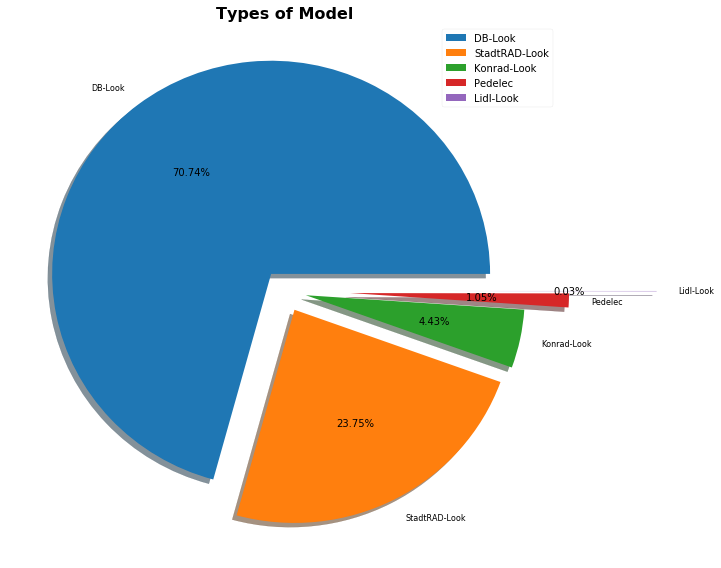

In [11]:
#colors = ["#5CD1FE", "#0AB9FB","#8BDAF9", "#ACE6FD","#000000"]
plt.figure(figsize=(8,8))
plt.title('Types of Model', fontsize=16, fontweight='bold')
explode = (0.1,0.1,0.1,0.3,0.7)
plt.pie(model_count,labels=model_name, startangle = 0,shadow=True,autopct='%1.2f%%',explode=explode)
plt.legend(model_name, fontsize = 'medium', loc = "best")
plt.tight_layout()
plt.show()

In [12]:
vehicle = df['VEHICLE_TYPE_NAME'].unique()
vehicle

array(['CallBike', 'StadtRAD', 'Konrad', 'Pedelec', 'LIDL-BIKE'], dtype=object)

In [13]:
vehicle_dict={}
vehicle_name, vehicle_count = [],[]
for v in vehicle:
    vehicle_dict[v] = len(df[df['VEHICLE_TYPE_NAME'] == v])
    vehicle_name.append(v)
    vehicle_count.append(vehicle_dict[v])
print(vehicle_name)
print(vehicle_count)

['CallBike', 'StadtRAD', 'Konrad', 'Pedelec', 'LIDL-BIKE']
[7943, 2667, 497, 118, 3]


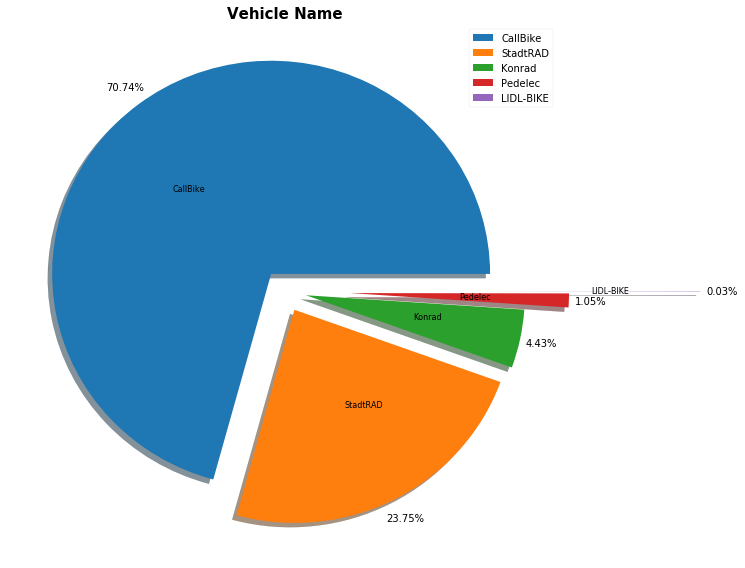

In [14]:
colors = ["#0AB9FB", "#5CD1FE","#8BDAF9", "#ACE6FD","#000000"]
plt.figure(figsize=(8,8))
plt.title('Vehicle Name', fontsize=15, fontweight='bold')
explode = (0.1,0.1,0.1,0.3,0.9)
plt.pie(vehicle_count,pctdistance=1.1,labels=vehicle_name, labeldistance=0.5,startangle = 0,shadow=True,autopct='%1.2f%%',explode=explode)
plt.legend(vehicle_name, fontsize = 'medium', loc = "best")
plt.tight_layout()
plt.show()

In [15]:
access = df['ACCESS_CONTROL_COMPONENT_TYPE'].unique()

In [16]:
access_dict={}
access_name, access_count = [],[]
for a in access:
    access_dict[a] = len(df[df['ACCESS_CONTROL_COMPONENT_TYPE'] == a])
    access_name.append(a)
    access_count.append(access_dict[a])
print(access_name)
print(access_count)

['CAB GPRS 2.0', 'CAB 4.0', 'CAB 2.0', 'CAB 1.0']
[5815, 1601, 3757, 55]


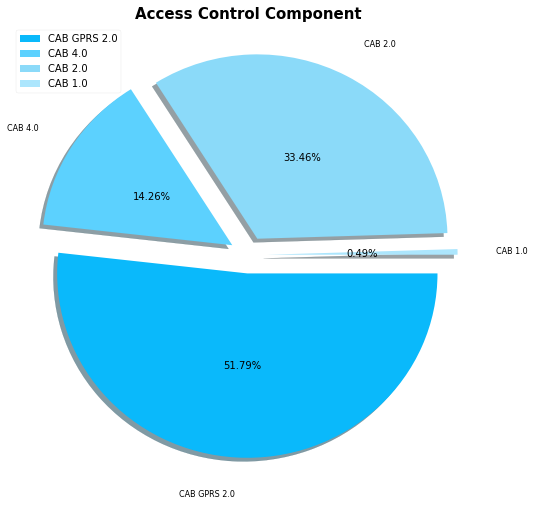

In [17]:
colors = ["#0AB9FB", "#5CD1FE","#8BDAF9", "#ACE6FD"]
plt.figure(figsize=(7,7))
plt.title('Access Control Component', fontsize=15, fontweight='bold')
explode = (0.1,0.1,0.1,0.1)
plt.pie(access_count, labels=access_name,pctdistance=0.5, labeldistance=1.2, startangle = 0,colors=colors,shadow=True,counterclock=False,autopct='%1.2f%%',explode=explode)
plt.legend(access_name, fontsize = 'medium', loc = "best")
plt.tight_layout()
plt.show()

In [18]:
company = df['COMPANY'].unique()

In [19]:
company_dict={}
company_name, company_count = [],[]
for c in company:
    company_dict[c] = len(df[df['COMPANY'] == c])
    company_name.append(c)
    company_count.append(company_dict[c])
print(company_name)
print(company_count)

['Call a Bike', 'StadtRAD Hamburg', 'Konrad']
[8062, 2669, 497]


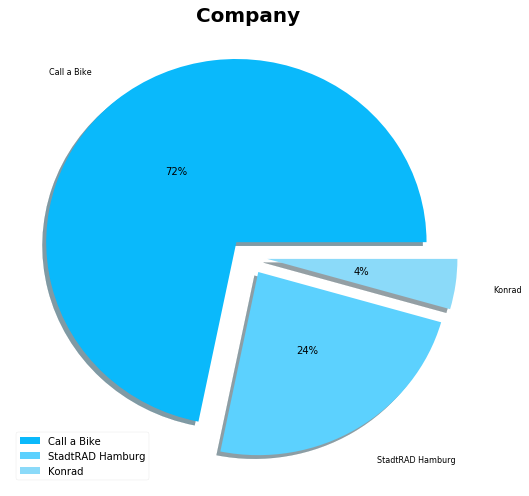

In [20]:
colors = ["#0AB9FB", "#5CD1FE","#8BDAF9", "#ACE6FD","#0098D4"]
plt.figure(figsize=(7,7))
plt.title('Company', fontsize=20, fontweight='bold')
explode = (0.1,0.1,0.1)
plt.pie(company_count, labels=company_name,pctdistance=0.5, labeldistance=1.2,startangle = 0,colors=colors,shadow=True,autopct='%1.0f%%',explode=explode)
plt.legend(company_name, fontsize = 'medium')
plt.tight_layout()
plt.show()
